In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

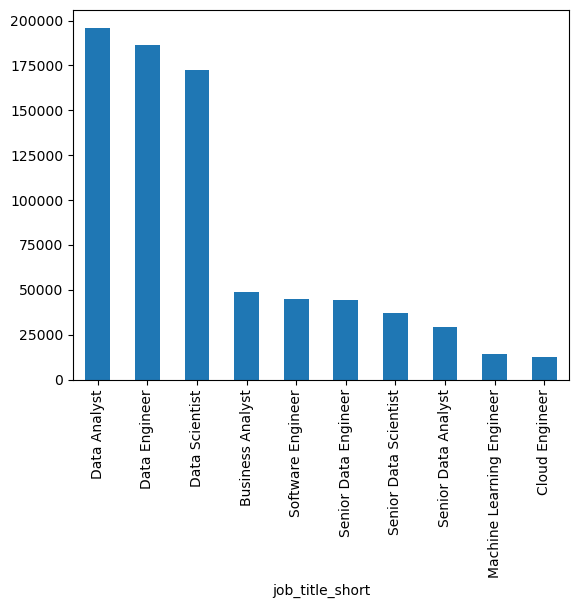

In [5]:
fig, ax = plt.subplots()

df['job_title_short'].value_counts().plot(kind='bar', ax=ax)

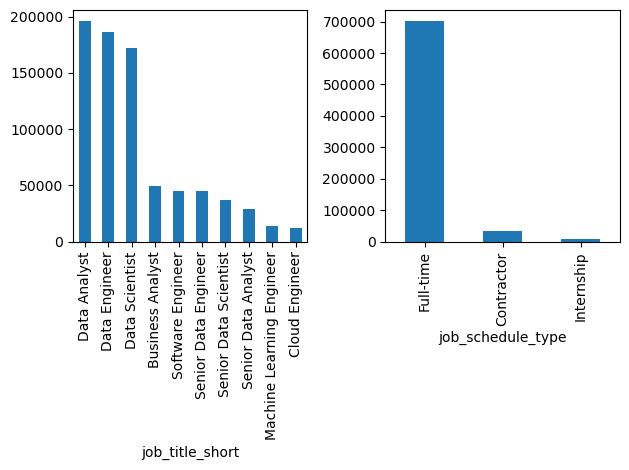

In [ ]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[0])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[1])

fig.tight_layout()

In [10]:
job_titles = ['Data Scientist', 'Data Engineer', 'Data Analyst']

0 Data Scientist
1 Data Engineer
2 Data Analyst


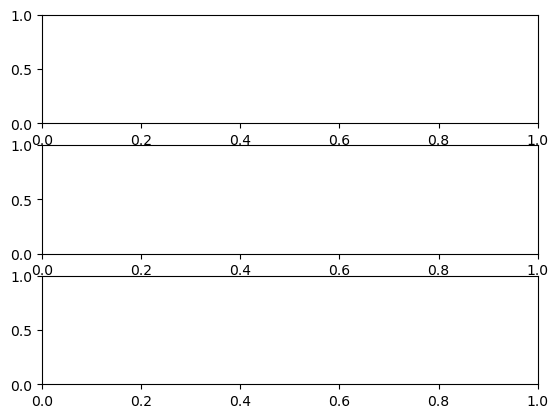

In [ ]:
fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_skills_count[df_skills_count['job_title_short']== job_title].head()

Problems

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

In [21]:
postings_location = df.job_location.value_counts().head(3)
postings_location

job_location
Anywhere         69552
Singapore        23415
Paris, France    12311
Name: count, dtype: int64

In [23]:
postings_titles = df.job_title_short.value_counts().head(3)
postings_titles

job_title_short
Data Analyst      196075
Data Engineer     186241
Data Scientist    172286
Name: count, dtype: int64

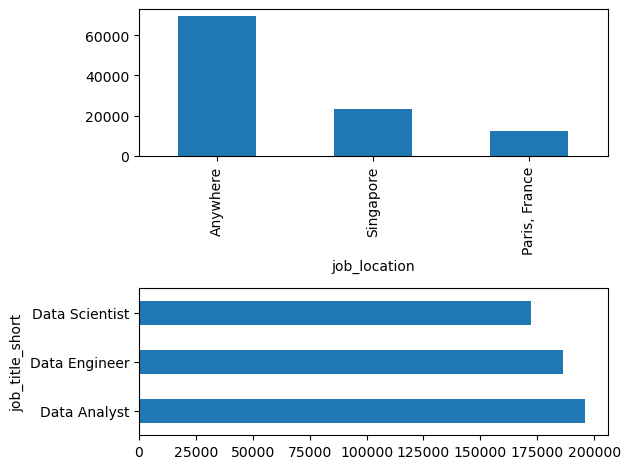

In [27]:
fig, ax= plt.subplots(2, 1)

postings_location.plot(kind='bar', ax=ax[0])
postings_titles.plot(kind='barh', ax=ax[1])

fig.tight_layout()

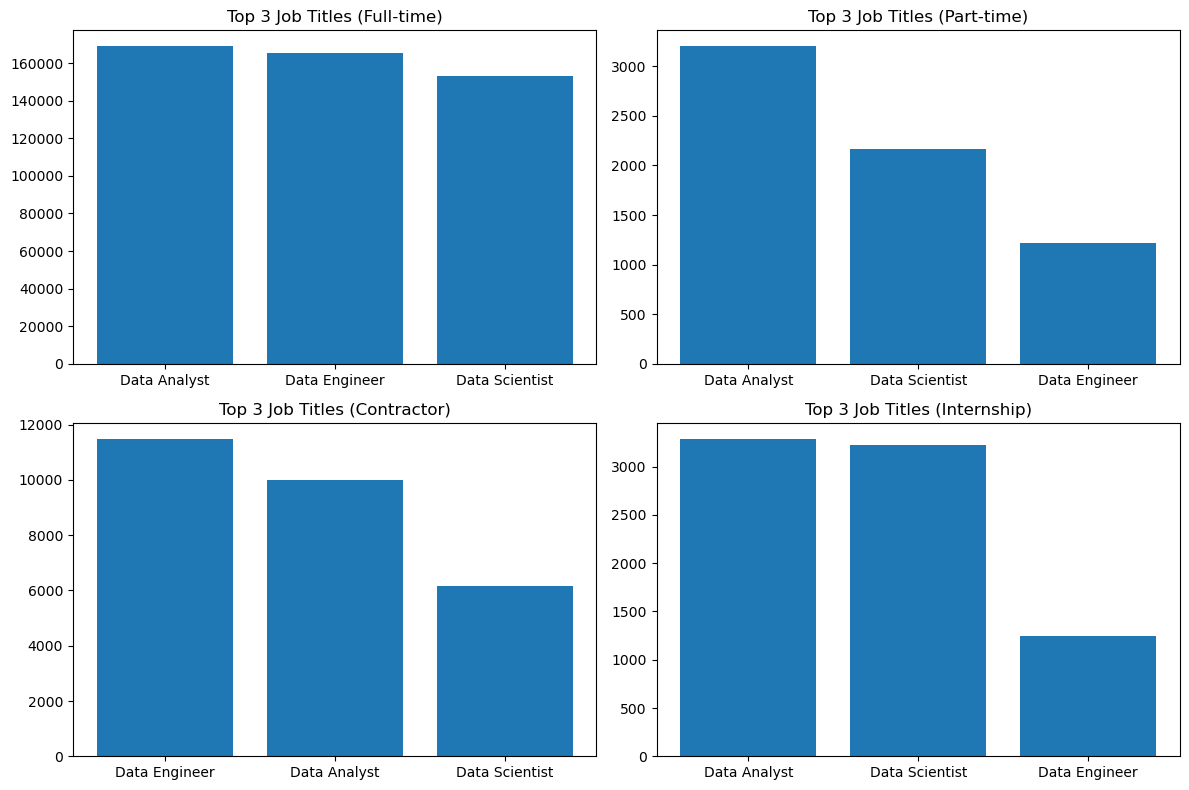

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(12, 8))

schedules = ['Full-time', 'Part-time', 'Contractor', 'Internship']

for i, schedule in enumerate(schedules):
    df_schedule = df[df['job_schedule_type'] == schedule]
    job_titles = df_schedule['job_title_short'].value_counts().head(3)
    ax[i//2, i%2].bar(job_titles.index, job_titles.values)
    ax[i//2, i%2].set_title(f'Top 3 Job Titles ({schedule})')

fig.tight_layout()
plt.show()


In [50]:
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']

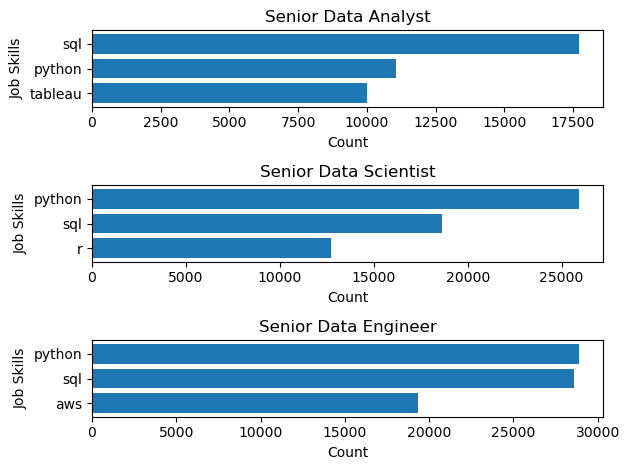

In [51]:
df_skills = df.explode('job_skills')
job_roles = ['Senior Data Analyst', 'Senior Data Scientist', 'Senior Data Engineer']
fig, ax = plt.subplots(len(job_roles), 1)
for i, role in enumerate(job_roles):
    role_skills = df_skills[df_skills['job_title_short'] == role]['job_skills'].value_counts().head(3)
    ax[i].barh(role_skills.index, role_skills.values)
    ax[i].set_title(role)
    ax[i].set_xlabel('Count')
    ax[i].set_ylabel('Job Skills')
    ax[i].invert_yaxis()
fig.tight_layout()
plt.show()